In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_0=-10;x_l=10;mu=0.5;b=1;T=1;dx=0.05;dt=((dx**2*mu)/b)
Nx=int((x_l-x_0)/dx); Nt=int(T/dt);UTa=0;UTb=0

In [4]:
x=np.arange(x_0,x_l+dx,dx)
t=np.arange(0,T+dt,dt)

In [5]:
U=np.zeros((len(t),len(x)))
U0=[]

for i in x:
    U01=max(1-i**2,0)
    U0.append(U01)
U[0]=U0

for i in range(len(t)-1):
    for j in range(len(x)-1):
        U[i+1,j]=U[i,j]+mu*U[i,j+1]-2*mu*U[i,j]+mu*U[i,j-1]

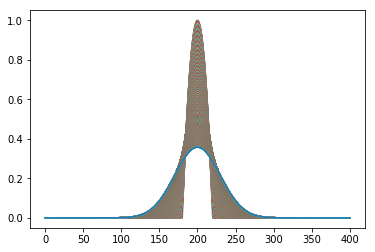

In [6]:
for i in range(len(t)):
    plt.plot(U[i])

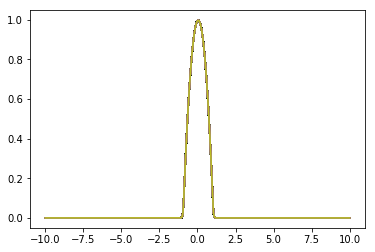

In [8]:
A=np.zeros((Nx-1,Nx-1))
F=np.zeros(Nx-1)

for i in range(Nx-2):
    A[i,i]=1+2*mu
    A[i+1,i]=A[i,i+1]=-mu
for i in range(Nx-1):
      F[i]=U0[i]
for i in range(1,Nt+1):
    Ui=np.matmul(np.linalg.inv(A),F)
    Ui=[UTa]+Ui.tolist()+[UTb]
    plt.plot(x,Ui)
    U0=Ui